# Maximum Independent Sets Induced by Rydberg Blockade on Neutral Atom Arrays

In [1]:
# necessary imports
import networkx as nx

from braket.aws import AwsDevice
from braket.tracking import Tracker

from braket.ahs.hamiltonian import Hamiltonian
from braket.ahs.atom_arrangement import AtomArrangement
from braket.ahs.analog_hamiltonian_simulation import AnalogHamiltonianSimulation

from braket.timings.time_series import TimeSeries
from braket.ahs.driving_field import DrivingField
from braket.ahs.shifting_field import ShiftingField
from braket.ahs.field import Field
from braket.devices import LocalSimulator

import matplotlib.pyplot as plt
import time
import numpy as np

from scipy import optimize
from iquhack_utils import visualize_graph

# Loading a Graph from our Graph Generation Tool

In [3]:
# from Graphs

n_nodes = 10

lattice_constant = 40

blockade_radius = 40


atomsX = np.array([80.0, 120.0, 160.0, 80.0, 160.0, 80.0, 120.0, 160.0, 200.0, 200.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 ])

atomsY = np.array([40.0, 40.0, 40.0, 80.0, 80.0, 120.0, 120.0, 120.0, 120.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 ])

atomsX = atomsX/lattice_constant
atomsY = atomsY/lattice_constant

In [4]:
def generate_graph_from_data(atomsX, atomsY, n_nodes, blockade_radius, lattice_constant):


    atom_list = []
    for ii in range(n_nodes):
        atom_list.append((atomsX[ii], atomsY[ii]))

    G = nx.Graph()

    nodes = []
    for ii in range(len(atom_list)):
        nodes.append((ii, {"pos":atom_list[ii]}))

    G.add_nodes_from(nodes)

    G.add_edges_from(nx.geometric_edges(G, radius=blockade_radius/lattice_constant))

    # G = nx.Graph()
    # for ii in range(len(atom_list)):
    #     G.add_node(ii)

    # for ii in range(len(verticesFirst)):
    #     G.add_edge(verticesFirst[ii], verticesSecond[ii])
    

    return atom_list, G

positions, G = generate_graph_from_data(atomsX, atomsY, n_nodes, blockade_radius, lattice_constant)
    

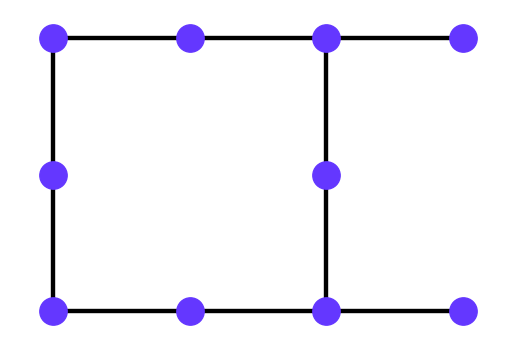

In [5]:
fig = plt.figure()
ax = plt.subplot(1,1,1)
visualize_graph(ax, G,positions)
plt.show()

In [3]:
input_graph = np.array([
    [0 , 0, 1, 0, 0],
    [0 , 1, 1, 1, 0],
    [1 , 1, 1, 1, 1],
    [0 , 0, 1, 0, 0],
    ])

In [23]:
# this is probably stupid code and there is probably a better way to build the graph but for some reason my brain is just not working today and I spent way too long dong nothing just trying to figure out a smart way to build the network.

def generate_unit_disk_graph(input_graph , scale=4.0*1e-6):
    '''
    Generates the unit disk graph encoded in the input_graph.
    input_graph   - [N x N] array of points
    scale         - lattice constant
    
    returns
    atom_list   - List of (x,y) coordinates for each atom in the graph
    G           - Nx logical graph
    '''

    rows, columns = input_graph.shape

    # Note that it is important for Aquila to maximize the number of atoms in the same row and thus the jj and ii are flipped
    #scale = 1
    atom_list = []
    for ii in range(rows):
        for jj in range (columns):
            if input_graph[ii,jj] == 1:
                atom_list.append((jj, ii))

    n_atoms = len(atom_list)

    # Creating the graph

    # Adding the nodes
    G = nx.Graph()
    for i in range(len(atom_list)):
        G.add_node(i)


    # Adding the edges if neighbours/next-nearest neighbours
    node_counter = 0
    for node in atom_list:

        neighbor_counter = 0
        for neighbor in atom_list:

            #neighbours around the first coordinate
            if (neighbor == (node[0], node[1]-1)) or (neighbor == (node[0], node[1]+1)):
                G.add_edge(node_counter, neighbor_counter)

            #neighbours around the second coordinate
            elif (neighbor == (node[0]-1, node[1])) or (neighbor == (node[0]+1, node[1])):
                G.add_edge(node_counter, neighbor_counter)

            #checking next-nearest neighbors
            elif (neighbor == (node[0]-1, node[1]-1)) or (neighbor == (node[0]-1, node[1]+1)) or (neighbor == (node[0]+1, node[1]-1)) or (neighbor == (node[0]+1, node[1]+1)):
                G.add_edge(node_counter, neighbor_counter)

            neighbor_counter += 1

        node_counter += 1


    # COMMENTED FOR NOW. MIGHT UNCOMMENT LATER
    # atoms = AtomArrangement()
    # # for atom in remaining_atom_list:
    # for atom in atom_list:
    #     #atoms.add(atom[0]*scale, atom[1]*scale)
    #     #print(atom)
    #     #atoms.add(atom*scale)
    #     atoms.add(tuple(xi*scale for xi in atom))

    
    return atom_list, G

positions, G = generate_unit_disk_graph(input_graph, 1)



fig = plt.figure()
ax = plt.subplot(1,1,1)
visualize_graph(ax, G,positions)
plt.show()


NameError: name 'input_graph' is not defined

In [36]:
positions

[(8.0, 6.0),
 (9.0, 5.0),
 (9.0, 7.0),
 (10.0, 6.0),
 (10.0, 7.0),
 (11.0, 8.0),
 (12.0, 9.0),
 (13.0, 10.0),
 (7.0, 4.0),
 (8.0, 5.0),
 (6.0, 3.0),
 (10.0, 5.0),
 (11.0, 4.0),
 (8.0, 7.0),
 (7.0, 8.0)]

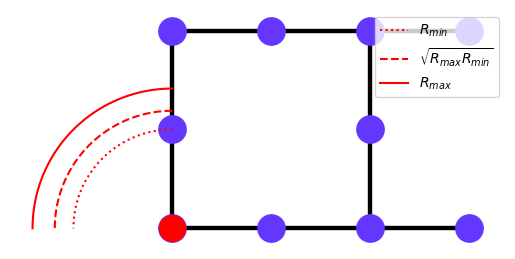

In [6]:
def find_UDG_radius(position, graph):
    '''
    Computes the optimal unit disk radius for a particular set of positions and graph.
    position   - [N] array of tuples (coordinates)
    graph       - network connectivity graph. This should be a unit disk graph.
    
    returns
    radius      - Optimal unit disk radius of the graph
    rmin        - Minimum distance
    rmax        - Maximum distance
    '''
    
    position = np.array(position)
    dists = np.sqrt((position[:,0,None] - position[:,0])**2
               + (position[:,1,None] - position[:,1])**2)
    rmin = 0
    rmax = np.inf
    for i in range(position.shape[0]):
        for j in range(i+1,position.shape[0]):
            if (i,j) in graph.edges:
                if rmin<dists[i,j]:
                    rmin = dists[i,j]
            elif (i,j) not in graph.edges:
                if rmax>dists[i,j]:
                    rmax = dists[i,j]
    
    if rmin>rmax:
        print(rmin,rmax)
        raise BaseException("Graph is not a unit disk graph!")
    
    return np.sqrt(rmin*rmax),rmin,rmax

# Find unit disk radius
unitdisk_radius,min_radius,max_radius = find_UDG_radius(positions, G)




# Visualize using networkx
fig = plt.figure()
ax = plt.subplot(1,1,1)
visualize_graph(ax,G,positions)


# Draw the minimum and maximum unit disk radius of the graph
x0,y0 = (positions[0][0],positions[0][1])
angles = np.linspace(np.pi/2,np.pi,1001)
ax.plot(min_radius*np.cos(angles)+x0,min_radius*np.sin(angles)+y0,
        linestyle=":",color="red",label="$R_{min}$")
ax.plot(unitdisk_radius*np.cos(angles)+x0,unitdisk_radius*np.sin(angles)+y0,
        linestyle="--",color="red",label="$\sqrt{R_{max}R_{min}}$")
ax.plot(max_radius*np.cos(angles)+x0,max_radius*np.sin(angles)+y0,
        linestyle="-",color="red",label="$R_{max}$")

ax.scatter(x0,y0,color="red",zorder=3,marker="o",s=350)
# ax.set_xlim((-0.25,3))
plt.legend(loc="upper right",)
plt.show()

In [9]:
unitdisk_radius

def get_final_detuning(blockade_radius,C6):
    final_detuning = C6 / np.power(blockade_radius,6)
    return final_detuning

In [11]:
from iquhack_utils import C6

get_final_detuning(blockade_radius*lattice_constant*1e-5, C6)

4.8828124999999844e+27

In [7]:
from iquhack_utils import get_blockade_radius,C6

# Might be possible to optimize
Delta_final = 20e6 # rad/sec

# Find blockade radius
blockade_radius = get_blockade_radius(Delta_final, 0) # no rabi amplitude at the end
print('Blockade radius of Rydberg system is {:0.3e}m'.format(blockade_radius))
print('Unit disk radius of logical graph is {:0.3f}'.format(unitdisk_radius))

Blockade radius of Rydberg system is 8.044e-06m
Unit disk radius of logical graph is 1.189


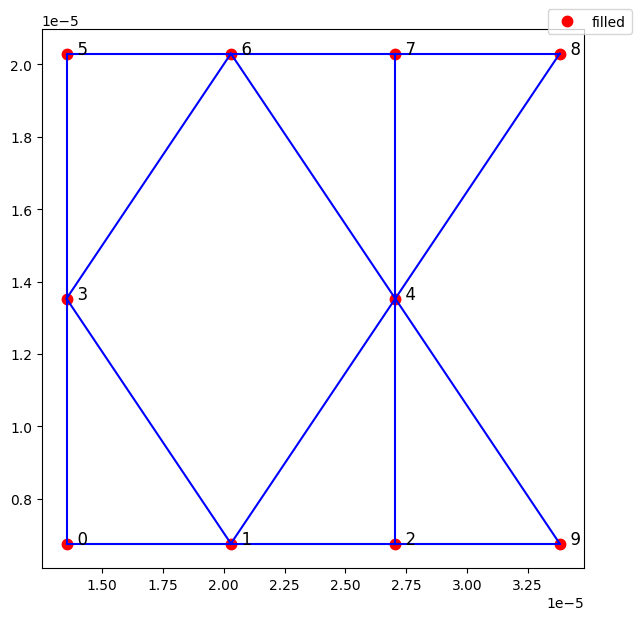

In [8]:
def generate_register(positions, blockade_radius, unitdisk_radius):

    # Compute scaling value a, which converts between logical and physical coordinates
    a = blockade_radius / unitdisk_radius

    # Generate the atom register
    atoms = AtomArrangement()
    # for atom in remaining_atom_list:
    for atom in positions:
        atoms.add(tuple(xi*a for xi in atom))

    return atoms, a

    
register, a = generate_register(positions, blockade_radius, unitdisk_radius)


from quera_ahs_utils.plotting import show_register
show_register(register,blockade_radius = a*1.5)

# Questions
# why are we multiplying by 1.5?


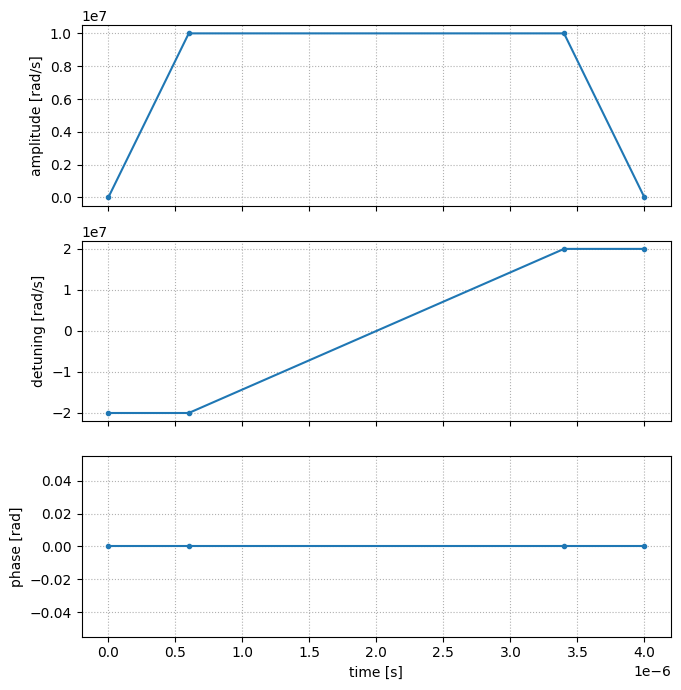

In [44]:
# Define a set of time points
time_points = [0, 0.6e-6, 3.4e-6, 4e-6]

# Define the strength of the transverse field Ω
amplitude_min = 0
amplitude_max = 10e6  # rad / sec

# Define the strength of the detuning Δ
Delta_initial = -20e6     # rad / sec
Delta_final = Delta_final # Defined above

# Define the total drive
from quera_ahs_utils.plotting import show_global_drive
from quera_ahs_utils.drive import get_drive 

amplitude_values = [amplitude_min, amplitude_max, amplitude_max, amplitude_min]  # piecewise linear
detuning_values = [Delta_initial, Delta_initial, Delta_final, Delta_final]  # piecewise linear
phase_values = [0, 0, 0, 0]  # piecewise constant


# Define the drive
drive = get_drive(time_points, amplitude_values, detuning_values, phase_values)
show_global_drive(drive);

In [45]:
from braket.ahs.analog_hamiltonian_simulation import AnalogHamiltonianSimulation
small_ahs_program = AnalogHamiltonianSimulation(
    register= register, 
    hamiltonian=drive
)

In [46]:
from braket.devices import LocalSimulator
import json

device = LocalSimulator("braket_ahs")
small_ahs_run = device.run(small_ahs_program, shots=1000)


def save_result_json(json_file,result):
    '''
    Helper function to save results locally
    '''
    result_dict = {"measurements":[]}
    for measurement in result.measurements:
        shot_result = {
            "pre_sequence":[int(qubit) for qubit in measurement.pre_sequence],
            "post_sequence":[int(qubit) for qubit in measurement.post_sequence]
                      } 
        result_dict["measurements"].append(shot_result)
        
    with open(json_file,"w") as io:
        json.dump(result_dict,io,indent=2)
        
def open_json(json_file):
    '''
    Helper function to load and open json data
    '''
    with open(json_file,"r") as io:
        return json.load(io) 

    
# Results are loaded and saved to file
result  = small_ahs_run.result()
save_result_json("example_graph_mis.json",result)

/Users/jorgegarciaponce/Projects/2023_QuEra_FinalProject/pythonvenv/lib/python3.10/site-packages/braket/analog_hamiltonian_simulator/rydberg/validators/atom_arrangement.py:108: UserWarning: Sites 0([Decimal('0.000030431780999091076'), Decimal('0.000022823835749318307')]) and site 9([Decimal('0.000030431780999091076'), Decimal('0.00001901986312443192')]) are too close. Their Euclidean distance (0.000003803972624886387000000000000 meters) is smaller than the typical scale (0.000004 meters). The coordinates of the sites should be specified in SI units.
  warnings.warn(
/Users/jorgegarciaponce/Projects/2023_QuEra_FinalProject/pythonvenv/lib/python3.10/site-packages/braket/analog_hamiltonian_simulator/rydberg/validators/atom_arrangement.py:108: UserWarning: Sites 0([Decimal('0.000030431780999091076'), Decimal('0.000022823835749318307')]) and site 13([Decimal('0.000030431780999091076'), Decimal('0.000026627808374204693')]) are too close. Their Euclidean distance (0.00000380397262488638600000

KeyboardInterrupt: 

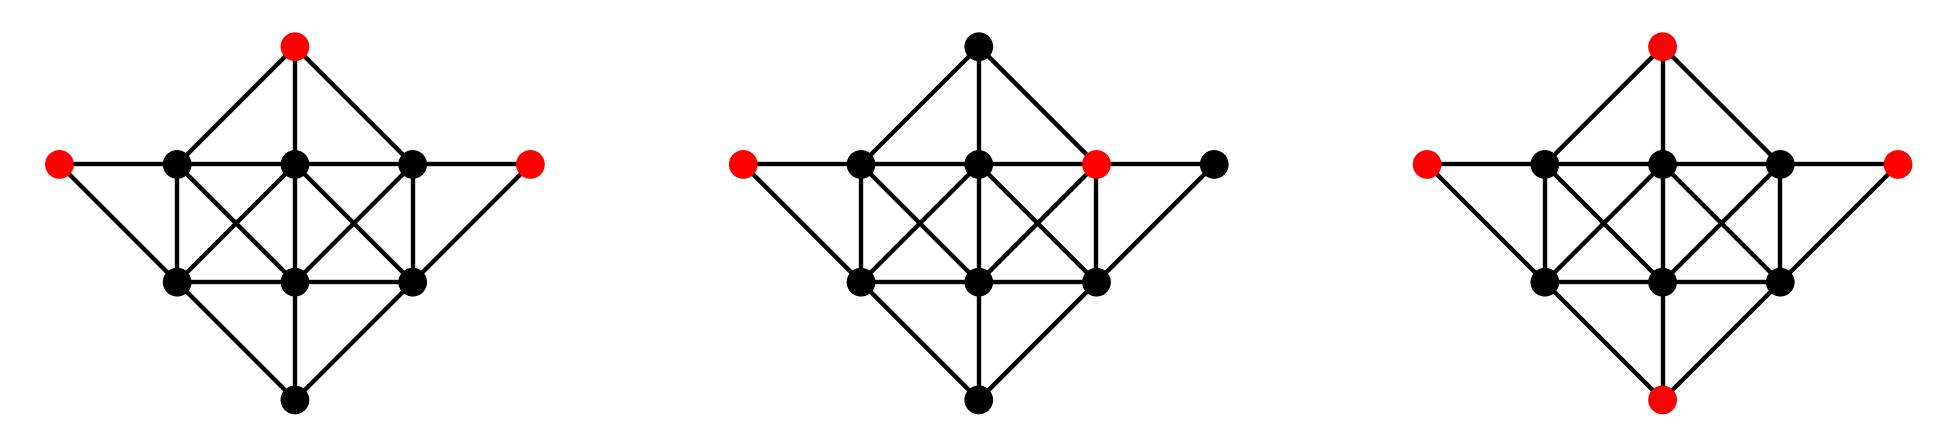

In [12]:
result_json = open_json("example_graph_mis.json")
nmeas = len(result_json["measurements"])    
seqs = [result_json["measurements"][i]["post_sequence"] for i in [0,1,nmeas-1]]

fig = plt.figure(figsize=(25,15))
for i in range(3):
    ax = plt.subplot(1,3,i+1)
    
    color_lookup = {0:"r",1:'k'}
    seqs_color = [color_lookup[seqs[i][j]] for j in range(len(seqs[i]))]
    visualize_graph(ax,G,positions,node_colors = seqs_color)
    
plt.show()

In [13]:
def postprocess_MIS(G,results):
    '''
    Removes vertices that violate the independent set condition
    G - networkx graph
    results - an AWS AnalogHamiltonianSimulationQuantumTaskResult
    
    returns
    data_out - a list of bitstrings which are valid independent sets of G
    '''
    data_out = []
    for measurement in results["measurements"]: # For each measurement...
        pre_sequence = np.array(measurement["pre_sequence"])
        post_sequence = np.array(measurement["post_sequence"])
        if np.any(pre_sequence==0): continue # skip anyshots with defects
            
        bitstring = post_sequence
        inds = np.nonzero(bitstring==0)[0]    # Find indices of IS vertices
        subgraph = nx.subgraph(G,inds)        # Generate a subgraph from those vertices. If the bitstring is an independent set, this subgraph has no edges.
        inds2 = nx.maximal_independent_set(subgraph,seed=0) # Find the mIS of this subgraph. If there are no edges, it is the original bitstring. Else, it randomly chooses within each graph.
        payload = np.ones(len(bitstring))     # Forge into the correct data structure (a list of 1s and 0s)
        payload[inds2] = 0
        data_out.append(payload)
        
    if len(data_out) == 0: 
        raise ValueError("no independent sets found! increase number of shots.")
        
    return np.asarray(data_out)

def analysis_MIS(graph,result_json):
    '''
    Helper function to analyze a MIS result and plot data
    '''

    post_bitstrings = np.array([q["post_sequence"] for q in result_json["measurements"]])
    pp_bitstrings = postprocess_MIS(graph, result_json)


    IS_sizes = np.sum(1-pp_bitstrings,axis=1)
    unique_IS_sizes,counts = np.unique(IS_sizes,return_counts=True)


    avg_no_pp = 'Average pre-processed size:  {:0.4f}'.format( (1-post_bitstrings).sum(axis=1).mean() )
    avg_pp = 'Average post-processed IS size: {:0.4f}'.format(IS_sizes.mean())
    print(avg_no_pp)
    print(avg_pp)
    plt.bar(unique_IS_sizes,counts/counts.sum())
    plt.xticks(unique_IS_sizes)
    plt.xlabel("IS sizes",fontsize=14)
    plt.ylabel("probability",fontsize=14)
    plt.show()
    
    return IS_sizes,pp_bitstrings
    


Average pre-processed size:  3.9880
Average post-processed IS size: 3.9880


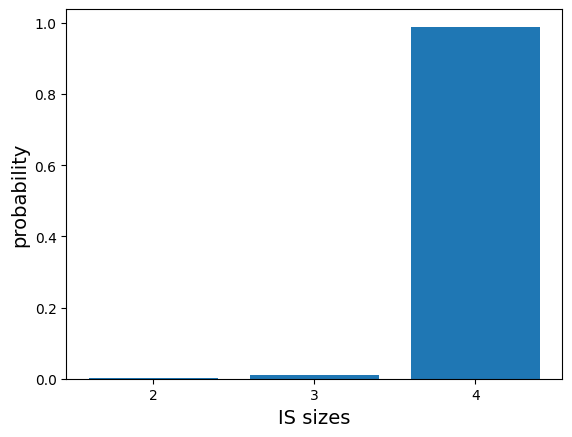

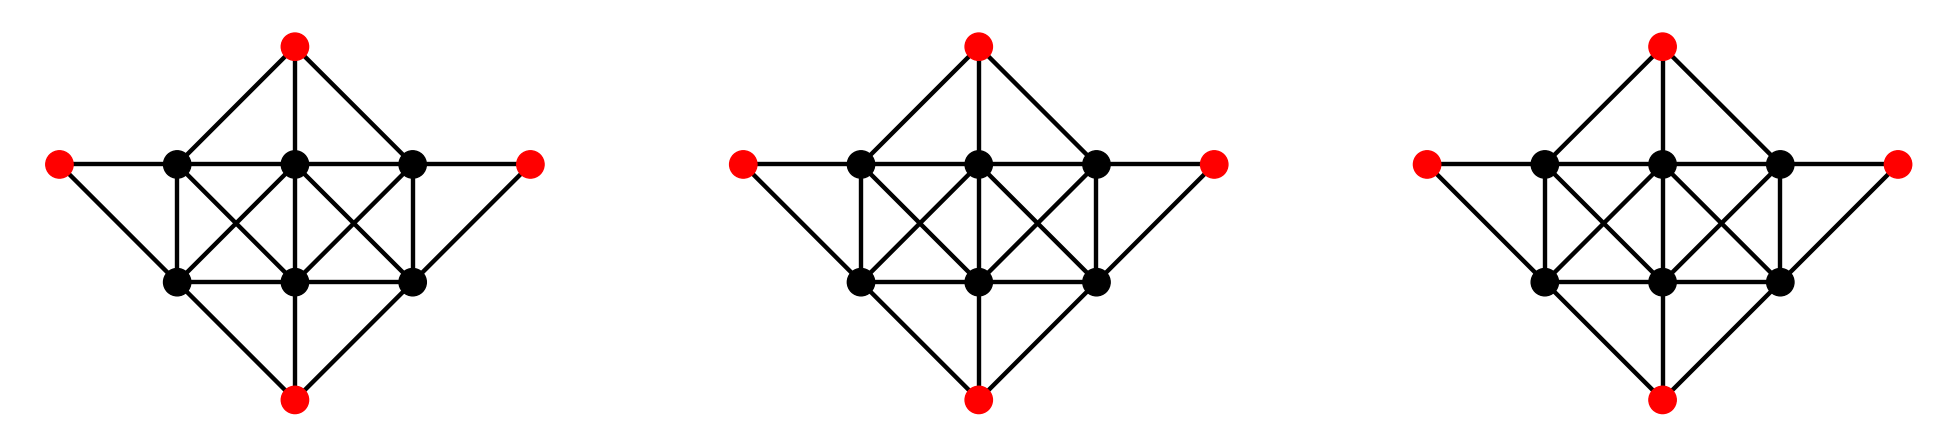

In [14]:
result_json = open_json("example_graph_mis.json")
IS_sizes,pp_bitstrings = analysis_MIS(G,result_json)

ind, = np.where(IS_sizes==IS_sizes.max())
n_show = min(len(ind),3)

fig = plt.figure(figsize=(25,15))
for i in range(n_show):
    ax = plt.subplot(1,n_show,i+1)

    color_lookup = {0:"r",1:'k'}
    seqs_color = [color_lookup[pp_bitstrings[ind[i]][j]] for j in range(len(pp_bitstrings[ind[i]]))]
    visualize_graph(ax, G,positions,node_colors = seqs_color)
    
plt.show()
    


# Optimizing the pulse sequence!


### QuEra Public Notebook:

In [28]:
def loss_piecewise_linear(atoms: AtomArrangement, x: list):
    assert len(x) == 3
    Delta_start = -13 * 2 * np.pi * 1e6
    Delta_0 = 11 * 2 * np.pi * 1e6
    Delta_end =  11 * 2 * np.pi * 1e6

    Omega_max = 2.5e7 # 4 * 2 * np.pi * 1e6
    T_max = 0.6 * 1e-6

    Deltas = TimeSeries()
    Deltas.put(0.0, Delta_start)
    Deltas.put(0.05 * 1e-6, Delta_start)
    Deltas.put(0.2 * 1e-6, Delta_0 * x[0])
    Deltas.put(0.3 * 1e-6, Delta_0 * x[1])
    Deltas.put(0.4 * 1e-6, Delta_0 * x[2])
    Deltas.put(0.55 * 1e-6, Delta_end)
    Deltas.put(T_max, Delta_end)
    
    # keep amplitude (Rabi frequency) constant once we turn it on
    Omegas = TimeSeries()
    Omegas.put(0.0, 0.0)
    Omegas.put(0.05 * 1e-6, 0.0)
    Omegas.put(0.1 * 1e-6, Omega_max)
    Omegas.put(0.5 * 1e-6, Omega_max)
    Omegas.put(0.55 * 1e-6, 0.0)
    Omegas.put(T_max, 0.0)

    # do not use the phase parameter
    Phi = TimeSeries().put(0.0, 0.0).put(T_max, 0.0)

    # for this problem, our Hamiltonian has no shifting field
    H = DrivingField(amplitude=Omegas, phase=Phi, detuning=Deltas)

    
    program = AnalogHamiltonianSimulation(hamiltonian=H, register=atoms)
    device = LocalSimulator("braket_ahs")
    
    # if you want to use Aquila, uncomment these lines
    # keep in mind that you may have to modify the fields
    #device = AwsDevice("arn:aws:braket:us-east-1::device/qpu/quera/Aquila")
    #program = program.discretize(device)
    
    # run the AHS program and extract measurements
    results = device.run(program, shots=1000, steps=100).result()
    
    
    r_counts = []
    
    # states are one of:
    # 'e' - empty
    # 'r' - Rydberg
    # 'g' - groundstate
    states = ['e', 'r', 'g']
    for shot in results.measurements:
        pre = shot.pre_sequence
        post = shot.post_sequence
        state_idx = np.array(pre) * (1 + np.array(post))
        state_labels = [states[s_idx] for s_idx in state_idx]
        r_count = np.count_nonzero([sl == 'r' for sl in state_labels])/len(atoms)
        r_counts.append(r_count)

    # the mean density of Rydberg states - this will be our cost
    # higher is better, as it corresponds to a larger independent set
    density_sum = np.mean(r_counts)
    
    return -density_sum, results, Deltas

In [29]:
start = time.time()
# initial waveform parameters
x0 = [0.1, 0.8, 0.8]
initial_rydberg_density, initial_registers, initial_Deltas = loss_piecewise_linear(register, x0)
print(f"Initial density: {initial_rydberg_density}")
# perform optimization
optresult = optimize.minimize(lambda x: loss_piecewise_linear(register, x)[0], x0, method='Nelder-Mead', options={'maxiter': 10})
final_rydberg_density, final_registers, final_Deltas = loss_piecewise_linear(register, optresult.x)
print(f"Final density: {final_rydberg_density}")
print(f"Final values: {optresult.x}")
stop = time.time()
print(f"Time to run AHS with local simulator: {stop-start}")

Initial density: -0.38160000000000005
Final density: -0.38150000000000006
Final values: [0.0975     0.81333333 0.81333333]
Time to run AHS with local simulator: 462.0020339488983


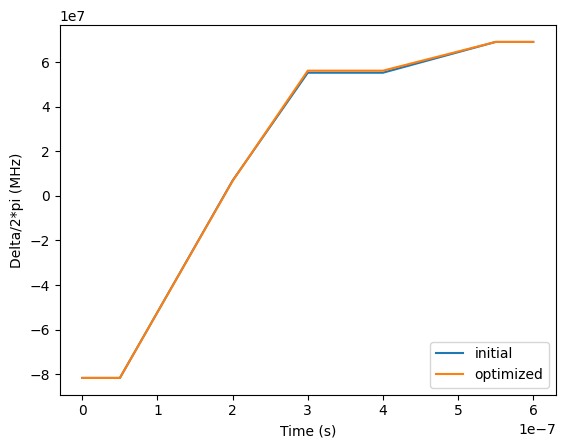

In [30]:
fig, ax = plt.subplots()
ax.plot(initial_Deltas.times(), initial_Deltas.values())
ax.plot(final_Deltas.times(), final_Deltas.values())
ax.set_xlabel("Time (s)")
ax.set_ylabel("Delta/2*pi (MHz)")
ax.legend(["initial", "optimized"], loc="lower right")
plt.show()

### IQuHack Suggested Protocol:

In [31]:
def loss(atoms: AtomArrangement, Delta_final):

    # Define a set of time points
    time_points = [0, 0.6e-6, 3.4e-6, 4e-6]

    # Define the strength of the transverse field Ω
    amplitude_min = 0
    amplitude_max = 10e6  # rad / sec

    # Define the strength of the detuning Δ
    Delta_initial = -20e6     # rad / sec
    Delta_final = Delta_final # Defined above

    # Define the total drive
    from quera_ahs_utils.plotting import show_global_drive
    from quera_ahs_utils.drive import get_drive 

    amplitude_values = [amplitude_min, amplitude_max, amplitude_max, amplitude_min]  # piecewise linear
    detuning_values = [Delta_initial, Delta_initial, Delta_final, Delta_final]  # piecewise linear
    phase_values = [0, 0, 0, 0]  # piecewise constant


    # Define the drive
    drive = get_drive(time_points, amplitude_values, detuning_values, phase_values)
    show_global_drive(drive);

    program = AnalogHamiltonianSimulation(
        register= register, 
        hamiltonian=drive
    )

    
    #program = AnalogHamiltonianSimulation(hamiltonian=H, register=atoms)
    device = LocalSimulator("braket_ahs")
    
    # if you want to use Aquila, uncomment these lines
    # keep in mind that you may have to modify the fields
    #device = AwsDevice("arn:aws:braket:us-east-1::device/qpu/quera/Aquila")
    #program = program.discretize(device)
    
    # run the AHS program and extract measurements
    results = device.run(program, shots=1000).result()
    

    r_counts = []
    
    # states are one of:
    # 'e' - empty
    # 'r' - Rydberg
    # 'g' - groundstate
    states = ['e', 'r', 'g']
    for shot in results.measurements:
        pre = shot.pre_sequence
        post = shot.post_sequence
        state_idx = np.array(pre) * (1 + np.array(post))
        state_labels = [states[s_idx] for s_idx in state_idx]
        r_count = np.count_nonzero([sl == 'r' for sl in state_labels])/len(atoms)
        r_counts.append(r_count)

    # the mean density of Rydberg states - this will be our cost
    # higher is better, as it corresponds to a larger independent set
    density_sum = np.mean(r_counts)
    
    return -density_sum, results #, Deltas

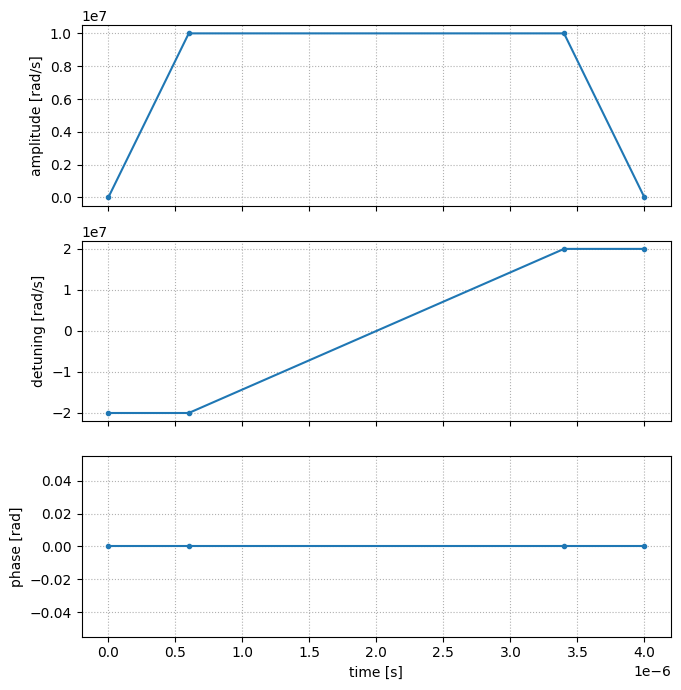

Average Rydberg Density -0.39820000000000005


In [33]:
rydberg_density, results =  loss(register, Delta_final)

print('Average Rydberg Density {}'.format(rydberg_density))

### After optimizing:

As you can see, the suggested protocol from iQuHack works better even after optimizng the other pulse sequence! Thus, we will just stick to it and not focus on improving the optimization since it is already pretty good!

In [71]:
# Let's define a function to run the graph and save the results
def run_experiment(atoms: AtomArrangement, Delta_final, path,run_on_aquila=  False):

    # Define a set of time points
    time_points = [0, 0.6e-6, 3.4e-6, 4e-6]

    # Define the strength of the transverse field Ω
    amplitude_min = 0
    amplitude_max = 10e6  # rad / sec

    # Define the strength of the detuning Δ
    Delta_initial = -20e6     # rad / sec
    #Delta_final = Delta_final # Defined above

    # Define the total drive
    from quera_ahs_utils.plotting import show_global_drive
    from quera_ahs_utils.drive import get_drive 

    amplitude_values = [amplitude_min, amplitude_max, amplitude_max, amplitude_min]  # piecewise linear
    detuning_values = [Delta_initial, Delta_initial, Delta_final, Delta_final]  # piecewise linear
    phase_values = [0, 0, 0, 0]  # piecewise constant


    # Define the drive
    drive = get_drive(time_points, amplitude_values, detuning_values, phase_values)
    #show_global_drive(drive);

    program = AnalogHamiltonianSimulation(
        register= register, 
        hamiltonian=drive
    )


    if run_on_aquila:
        # if you want to use Aquila, uncomment these lines
        # keep in mind that you may have to modify the fields
        device = AwsDevice("arn:aws:braket:us-east-1::device/qpu/quera/Aquila")
        program = program.discretize(device)
    else:
        device = LocalSimulator("braket_ahs")
    

    with Tracker() as tracker:
        # run the AHS program and extract measurements
        results = device.run(program, shots=1000000).result()
    

    save_result_json(path,results)

    r_counts = []
    
    # states are one of:
    # 'e' - empty
    # 'r' - Rydberg
    # 'g' - groundstate
    states = ['e', 'r', 'g']
    for shot in results.measurements:
        pre = shot.pre_sequence
        post = shot.post_sequence
        state_idx = np.array(pre) * (1 + np.array(post))
        state_labels = [states[s_idx] for s_idx in state_idx]
        r_count = np.count_nonzero([sl == 'r' for sl in state_labels])/len(atoms)
        r_counts.append(r_count)

    # the mean density of Rydberg states - this will be our cost
    # higher is better, as it corresponds to a larger independent set
    density_sum = np.mean(r_counts)
    
    return density_sum, results, tracker

# The Good Stuff:

#### Now, let's simulate an entire experiment to see what to expect when runing in Aquila!

In [72]:
name = "simple_gadget"

path =  "Results/" + name + ".json"

input_graph = np.array([
    [0 , 0, 1, 0, 0],
    [0 , 1, 1, 1, 0],
    [1 , 1, 1, 1, 1],
    [0 , 0, 1, 0, 0],
    ])

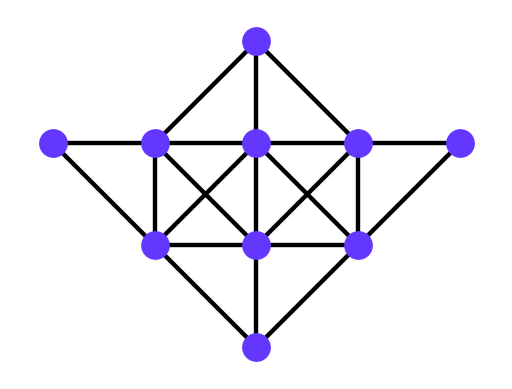

In [73]:
# Generate the unit disk graph encoded in the matrix
positions, G = generate_unit_disk_graph(input_graph, 1)

fig = plt.figure()
ax = plt.subplot(1,1,1)
visualize_graph(ax, G,positions)
plt.show()

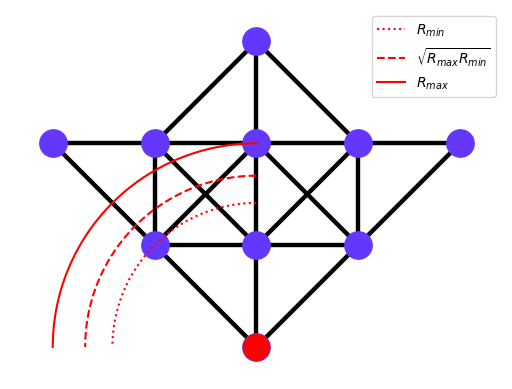

In [74]:
# Find unit disk radius
unitdisk_radius,min_radius,max_radius = find_UDG_radius(positions, G)

# Visualize using networkx
fig = plt.figure()
ax = plt.subplot(1,1,1)
visualize_graph(ax,G,positions)


# Draw the minimum and maximum unit disk radius of the graph
x0,y0 = (2,0)
angles = np.linspace(np.pi/2,np.pi,1001)
ax.plot(min_radius*np.cos(angles)+x0,min_radius*np.sin(angles)+y0,
        linestyle=":",color="red",label="$R_{min}$")
ax.plot(unitdisk_radius*np.cos(angles)+x0,unitdisk_radius*np.sin(angles)+y0,
        linestyle="--",color="red",label="$\sqrt{R_{max}R_{min}}$")
ax.plot(max_radius*np.cos(angles)+x0,max_radius*np.sin(angles)+y0,
        linestyle="-",color="red",label="$R_{max}$")

ax.scatter(x0,y0,color="red",zorder=3,marker="o",s=350)
# ax.set_xlim((-0.25,3))
plt.legend(loc="upper right",)
plt.show()

Blockade radius of Rydberg system is 8.044e-06m
Unit disk radius of logical graph is 1.682


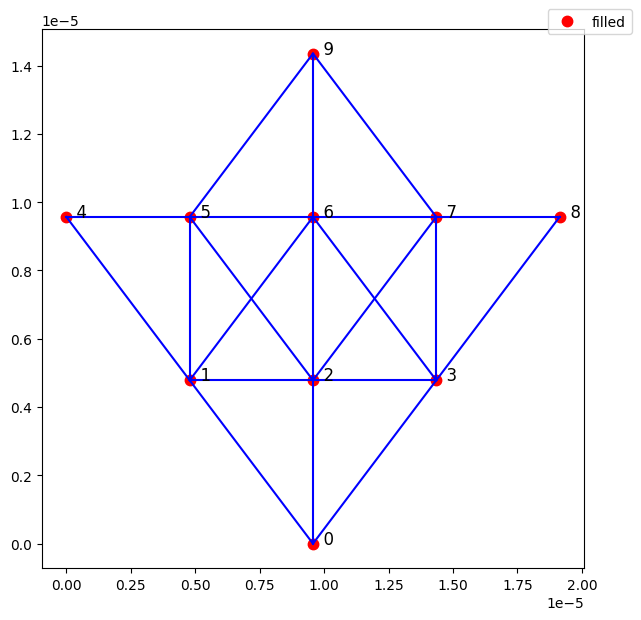

In [75]:
from iquhack_utils import get_blockade_radius,C6

# Might be possible to optimize
Delta_final = 20e6 # rad/sec

# Find blockade radius
blockade_radius = get_blockade_radius(Delta_final, 0) # no rabi amplitude at the end
print('Blockade radius of Rydberg system is {:0.3e}m'.format(blockade_radius))
print('Unit disk radius of logical graph is {:0.3f}'.format(unitdisk_radius))

register, a = generate_register(positions, blockade_radius, unitdisk_radius)


from quera_ahs_utils.plotting import show_register
show_register(register,blockade_radius = a*1.5)

# Questions
# why are we multiplying by 1.5?


## Running the experiment!

In [76]:
# Use Braket SDK Cost Tracking to estimate the cost to run this example

start = time.time()
rydberg_density, results, tracker = run_experiment(register, Delta_final, path)
stop = time.time()


print(f"Time to run: {stop-start}")
print("Task Summary")
print(tracker.quantum_tasks_statistics())
print('Note: Charges shown are estimates based on your Amazon Braket simulator and quantum processing unit (QPU) task usage. Estimated charges shown may differ from your actual charges. Estimated charges do not factor in any discounts or credits, and you may experience additional charges based on your use of other services such as Amazon Elastic Compute Cloud (Amazon EC2).')
print(f"Estimated cost to run this example: {tracker.qpu_tasks_cost() + tracker.simulator_tasks_cost():.2f} USD")


Time to run: 78.39849972724915
Task Summary
{}
Note: Charges shown are estimates based on your Amazon Braket simulator and quantum processing unit (QPU) task usage. Estimated charges shown may differ from your actual charges. Estimated charges do not factor in any discounts or credits, and you may experience additional charges based on your use of other services such as Amazon Elastic Compute Cloud (Amazon EC2).
Estimated cost to run this example: 0.00 USD


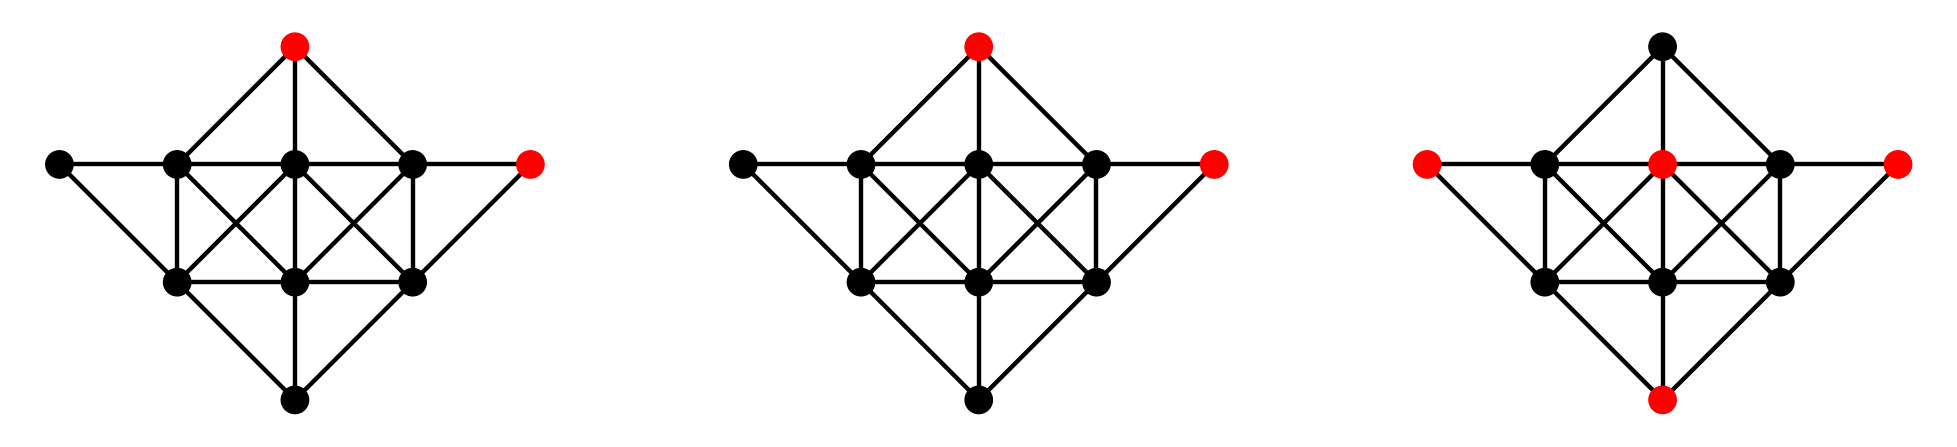

In [77]:
result_json = open_json("Results/" + name + ".json")
nmeas = len(result_json["measurements"])    
seqs = [result_json["measurements"][i]["post_sequence"] for i in [0,1,nmeas-4]]

fig = plt.figure(figsize=(25,15))
for i in range(3):
    ax = plt.subplot(1,3,i+1)
    
    color_lookup = {0:"r",1:'k'}
    seqs_color = [color_lookup[seqs[i][j]] for j in range(len(seqs[i]))]
    visualize_graph(ax,G,positions,node_colors = seqs_color)
    
plt.show()

Average pre-processed size:  3.9824
Average post-processed IS size: 3.9824


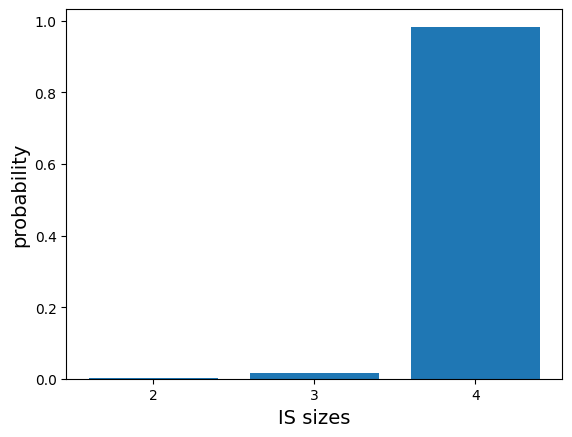

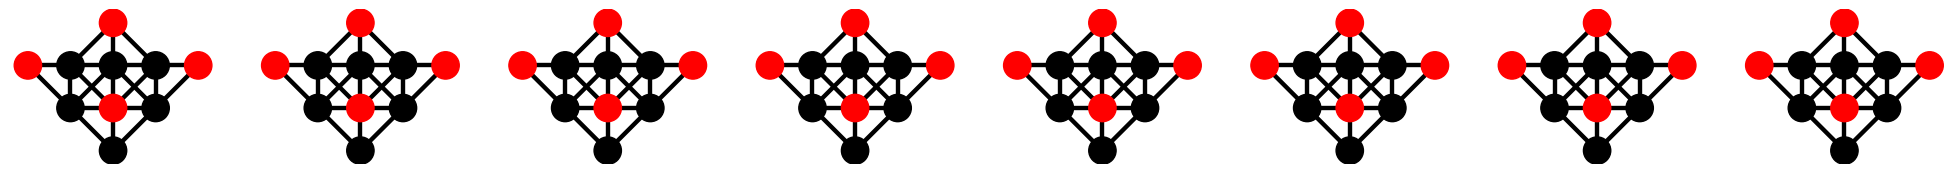

In [78]:
result_json = open_json(path)
IS_sizes,pp_bitstrings = analysis_MIS(G,result_json)

ind, = np.where(IS_sizes==IS_sizes.max())
n_show = min(len(ind),8)

fig = plt.figure(figsize=(25,15))
for i in range(n_show):
    ax = plt.subplot(1,n_show,i+1)

    color_lookup = {0:"r",1:'k'}
    seqs_color = [color_lookup[pp_bitstrings[ind[i+10]][j]] for j in range(len(pp_bitstrings[ind[i+10]]))]
    visualize_graph(ax, G,positions,node_colors = seqs_color)
    # for j in range(len(pp_bitstrings[ind[i]])):
    #     print(pp_bitstrings[ind[i]][j])
plt.show()

In [79]:
ind, = np.where(IS_sizes==IS_sizes.max())
len(ind,)



983559

In [69]:

different_MIS = []

different_MIS.append(pp_bitstrings[ind[0]])

for i in range(len(ind)):
    #fig = plt.figure()
    #ax = plt.subplot(1,1,1)
    # color_lookup = {0:"r",1:'k'}
    # seqs_color = [color_lookup[pp_bitstrings[ind[i]][j]] for j in range(len(pp_bitstrings[ind[i]]))]
    # #visualize_graph(ax, G,positions,node_colors = seqs_color)
    # if seqs_color not in different_MIS:
    #     different_MIS.append(seqs_color)
    # print(seqs_color)
    #print(pp_bitstrings[ind[i]])
    # for j in different_MIS:
    #     if np.array_equal(pp_bitstrings[ind[i]], j):
    #         break
    #     else:
    #         different_MIS.append(pp_bitstrings[ind[i]])
    #         print("adding a new one")


In [70]:
len(different_MIS)
#type(different_MIS[0])

1

### Lieb Lattice

In [142]:
name = "simple_gadget"

path =  "Results/" + name + ".json"

input_graph = np.array([
    [1, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 1, 1, 1],
    [1, 0, 1, 0],
])

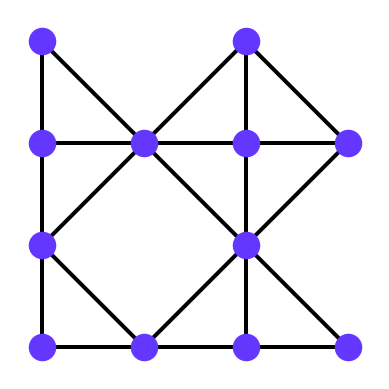

In [143]:
# Generate the unit disk graph encoded in the matrix
positions, G = generate_unit_disk_graph(input_graph, 1)

fig = plt.figure()
ax = plt.subplot(1,1,1)
visualize_graph(ax, G,positions)
plt.show()

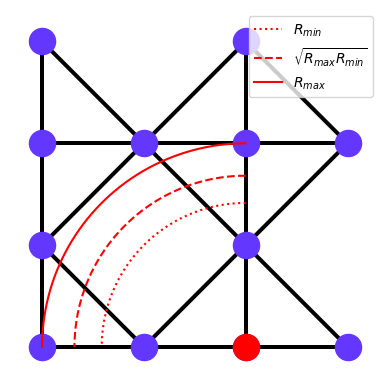

In [144]:
# Find unit disk radius
unitdisk_radius,min_radius,max_radius = find_UDG_radius(positions, G)

# Visualize using networkx
fig = plt.figure()
ax = plt.subplot(1,1,1)
visualize_graph(ax,G,positions)


# Draw the minimum and maximum unit disk radius of the graph
x0,y0 = (2,0)
angles = np.linspace(np.pi/2,np.pi,1001)
ax.plot(min_radius*np.cos(angles)+x0,min_radius*np.sin(angles)+y0,
        linestyle=":",color="red",label="$R_{min}$")
ax.plot(unitdisk_radius*np.cos(angles)+x0,unitdisk_radius*np.sin(angles)+y0,
        linestyle="--",color="red",label="$\sqrt{R_{max}R_{min}}$")
ax.plot(max_radius*np.cos(angles)+x0,max_radius*np.sin(angles)+y0,
        linestyle="-",color="red",label="$R_{max}$")

ax.scatter(x0,y0,color="red",zorder=3,marker="o",s=350)
# ax.set_xlim((-0.25,3))
plt.legend(loc="upper right",)
plt.show()

Blockade radius of Rydberg system is 8.044e-06m
Unit disk radius of logical graph is 1.682


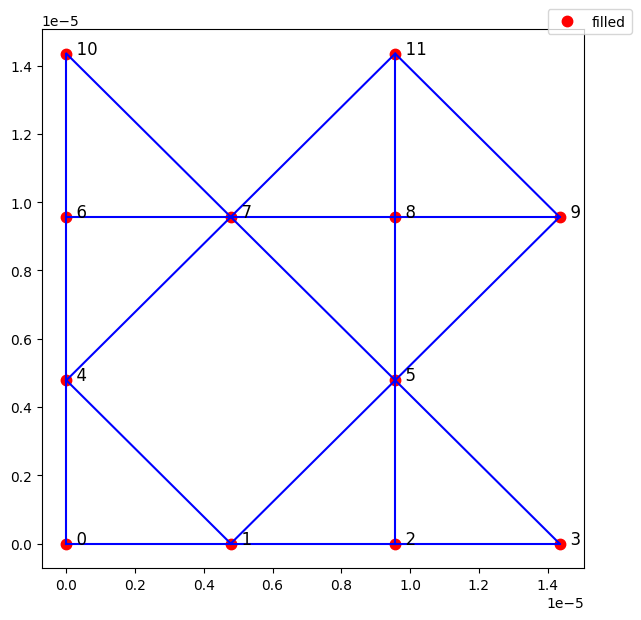

In [145]:
from iquhack_utils import get_blockade_radius,C6

# Might be possible to optimize
Delta_final = 20e6 # rad/sec

# Find blockade radius
blockade_radius = get_blockade_radius(Delta_final, 0) # no rabi amplitude at the end
print('Blockade radius of Rydberg system is {:0.3e}m'.format(blockade_radius))
print('Unit disk radius of logical graph is {:0.3f}'.format(unitdisk_radius))

register, a = generate_register(positions, blockade_radius, unitdisk_radius)


from quera_ahs_utils.plotting import show_register
show_register(register,blockade_radius = a*1.5)

# Questions
# why are we multiplying by 1.5?

In [146]:
start = time.time()
rydberg_density, results, tracker = run_experiment(register, Delta_final, path)
stop = time.time()


print(f"Time to run: {stop-start}")
print("Task Summary")
print(tracker.quantum_tasks_statistics())
print('Note: Charges shown are estimates based on your Amazon Braket simulator and quantum processing unit (QPU) task usage. Estimated charges shown may differ from your actual charges. Estimated charges do not factor in any discounts or credits, and you may experience additional charges based on your use of other services such as Amazon Elastic Compute Cloud (Amazon EC2).')
print(f"Estimated cost to run this example: {tracker.qpu_tasks_cost() + tracker.simulator_tasks_cost():.2f} USD")


Time to run: 95.71262001991272
Task Summary
{}
Note: Charges shown are estimates based on your Amazon Braket simulator and quantum processing unit (QPU) task usage. Estimated charges shown may differ from your actual charges. Estimated charges do not factor in any discounts or credits, and you may experience additional charges based on your use of other services such as Amazon Elastic Compute Cloud (Amazon EC2).
Estimated cost to run this example: 0.00 USD


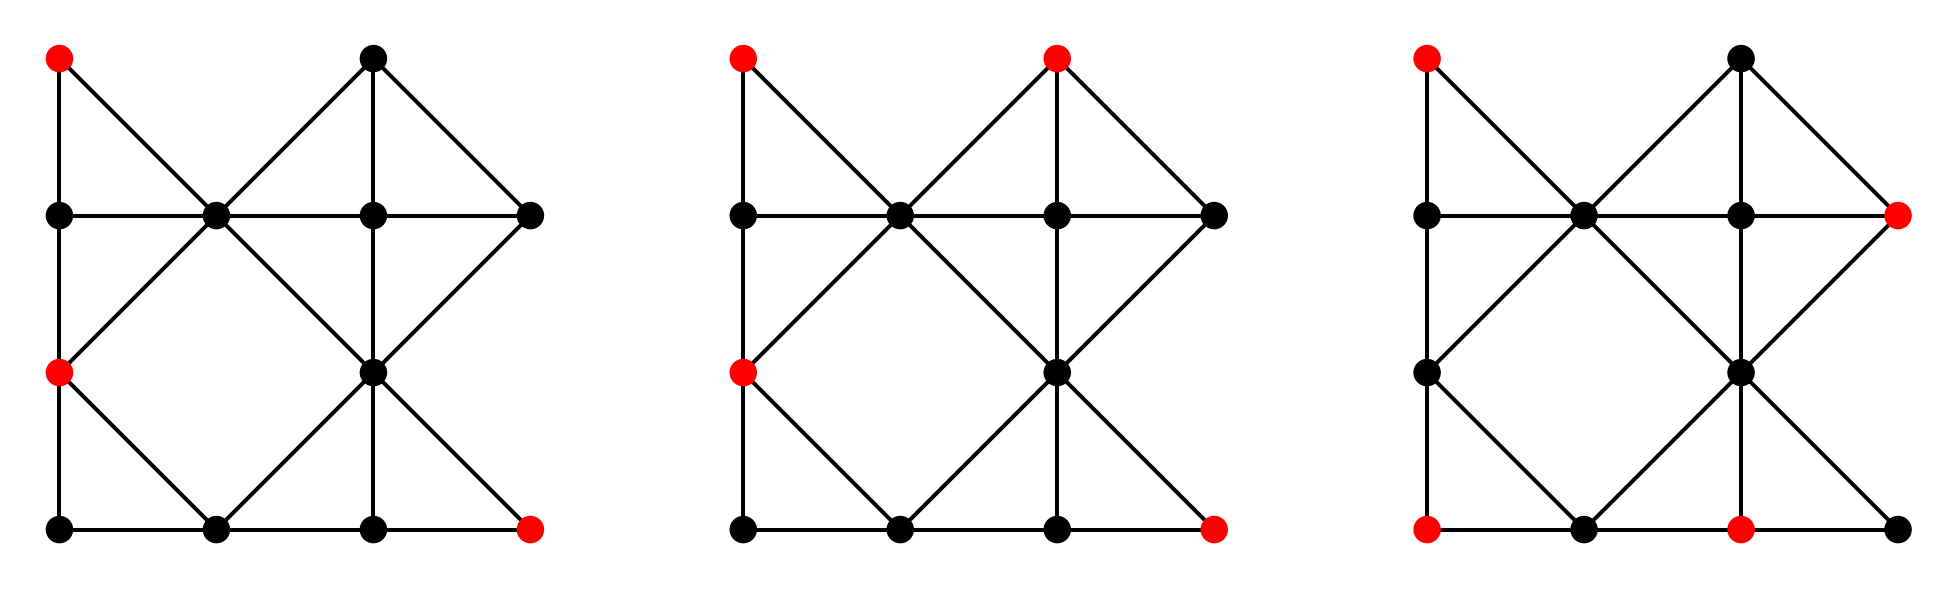

In [147]:
result_json = open_json("Results/" + name + ".json")
nmeas = len(result_json["measurements"])    
seqs = [result_json["measurements"][i]["post_sequence"] for i in [0,1,nmeas-4]]

fig = plt.figure(figsize=(25,15))
for i in range(3):
    ax = plt.subplot(1,3,i+1)
    
    color_lookup = {0:"r",1:'k'}
    seqs_color = [color_lookup[seqs[i][j]] for j in range(len(seqs[i]))]
    visualize_graph(ax,G,positions,node_colors = seqs_color)
    
plt.show()

Average pre-processed size:  3.9830
Average post-processed IS size: 3.9820


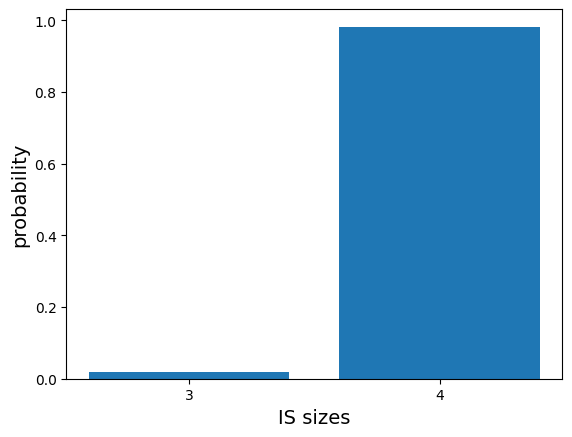

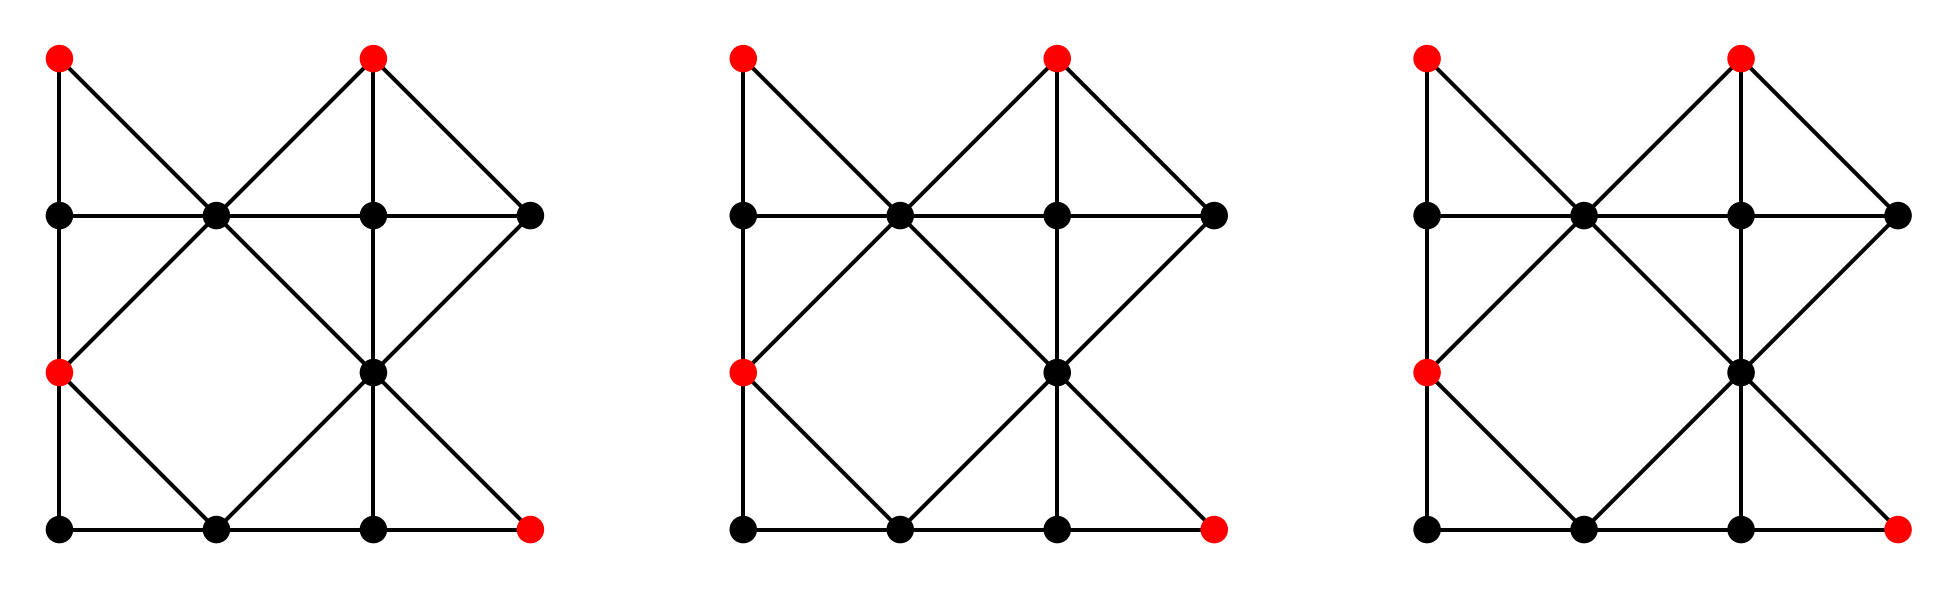

In [148]:
result_json = open_json(path)
IS_sizes,pp_bitstrings = analysis_MIS(G,result_json)

ind, = np.where(IS_sizes==IS_sizes.max())
n_show = min(len(ind),3)

fig = plt.figure(figsize=(25,15))
for i in range(n_show):
    ax = plt.subplot(1,n_show,i+1)

    color_lookup = {0:"r",1:'k'}
    seqs_color = [color_lookup[pp_bitstrings[ind[i]][j]] for j in range(len(pp_bitstrings[ind[i]]))]
    visualize_graph(ax, G,positions,node_colors = seqs_color)
    
plt.show()

# Time to automate running each graph!